THIS FILE INCLUDES ONLY A FEW SELECT FEATURES IF YOU WANT ALL THE FEATURES INCLUDED, PLEASE REFER TO shapinterpretation ALL FEATURE.ipynb
THIS FILE DOES NOT INCLUDE OPTUNA OPTIMIZATION


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import shap
#from shap.plots import *
df = pd.read_csv('train.csv')

new = df[['SalePrice', 'OverallQual','LotArea' ,'OverallCond', 
          'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea','BedroomAbvGr',
          'HalfBath','FullBath','GarageArea', 'MoSold', 'YrSold', '1stFlrSF', 
          '2ndFlrSF', 'PoolArea', 'MSSubClass']].copy()

new = new.dropna() ## drops the NULL rows


X = new.drop(columns = 'SalePrice') #Training features


y= new['SalePrice'] #Sale price

#train model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lr = LinearRegression()
model = lr.fit(X_train,y_train)

c = lr.intercept_ #debug
m = lr.coef_ #debug
y_pred_train = lr.predict(X_train)
a= lr.predict(X_test)
feature_coef = {}
#get each coef of each feature into a list
for x in range(lr.n_features_in_):

  name = lr.feature_names_in_[x]
  coef = lr.coef_[x]
  
  feature_coef[name] = coef
  
# sort the dictionnary higher to lower coef
feature_coef_sorted = sorted(feature_coef.items(), key=lambda x:x[1], reverse = True)
print("############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############")
print(*feature_coef_sorted, sep="\n")
##r2_score(y_train, y_pred_train)

# initialize shap interpretation
explainer = shap.Explainer(lr.predict, X)
shap_values = explainer(X)
#shap.plots.bar(shap_values)

#shap.initjs()
#shap.plots.force(shap_values[0])

############## COEF VALUES WHEN USING LINEAR REGRESSION ALGORITHM ##############
('OverallQual', 16676.427870974752)
('OverallCond', 5414.337532724935)
('HalfBath', 752.9814275413829)
('YearBuilt', 427.82862618554964)
('YearRemodAdd', 136.10221017904104)
('GrLivArea', 52.11614102355469)
('GarageArea', 35.995948709235805)
('TotalBsmtSF', 28.012183290528146)
('PoolArea', 23.67491414707938)
('1stFlrSF', 17.73261824975572)
('2ndFlrSF', 17.444728907121394)
('LotArea', 0.6141459971105405)
('MSSubClass', -161.49944699053702)
('MoSold', -355.0169693939408)
('YrSold', -507.6477907804012)
('FullBath', -1554.029131273658)
('BedroomAbvGr', -9224.462453108716)


Permutation explainer: 1461it [00:23, 35.52it/s]                          


Overall we can see by this printed out list the the OverallQual and OverAllcond seems to dominate the influence over the house pricing. 

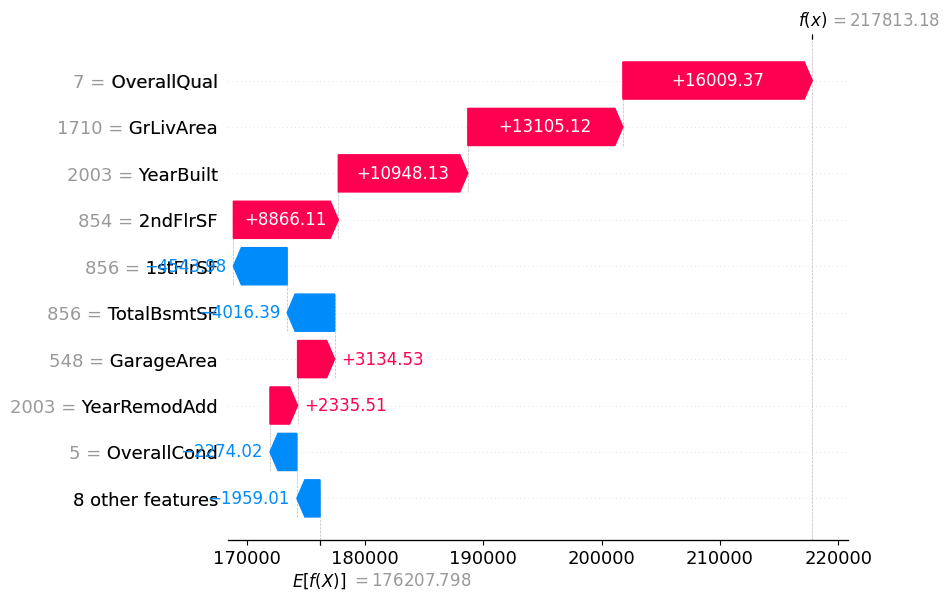

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


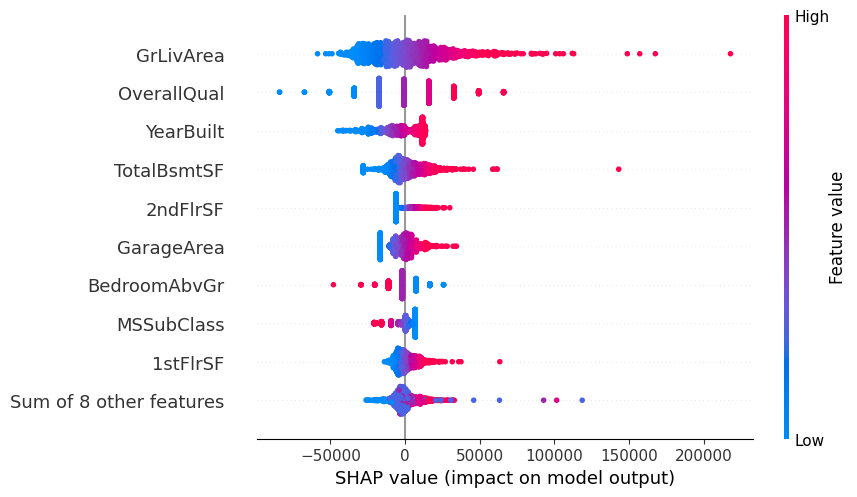

In [3]:
shap.plots.waterfall(shap_values[0]) 
shap.plots.beeswarm(shap_values)
shap.initjs()
shap.plots.force(shap_values)

However, using the SHAP method, to get the TRUE value of each feature, we realize that the GrLivArea, OverallQual, Yearbuilt seem to be influencing house pricing the most. 
While feature influence may vary according to every test houses, it is important to notice some patterns.

In summary:
The SHAP analysis of the set allowed us to determine the most infuencial feature of our set. We can see a clear difference between the coefficient of the linear regression model and the coefficients of the SHAP value interpretation. This highlight the importance to assess our model with tools such as SHAP.
